In [1]:
import os
import pandas as pd
from IPython.display import Image

#math/stats imports
import numpy as np
from scipy.stats import norm, pearsonr, pointbiserialr

#viz imports
import matplotlib.pyplot as plt
import seaborn as sns

#modeling imports
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc


import warnings
warnings.filterwarnings('ignore')

import itertools

# Wisconsin Breast Cancer Analysis
Data from Kaggle: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data/data

In [2]:
df = pd.read_csv('./Data/data.csv')
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.drop(columns = ['Unnamed: 32'], inplace = True)

In [5]:
mean_columns = ['radius_mean', 'texture_mean', 'perimeter_mean'
                , 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean'
                , 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

se_columns = ['radius_se', 'texture_se', 'perimeter_se', 'area_se'
              , 'smoothness_se', 'compactness_se', 'concavity_se'
              , 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

worst_columns = ['radius_worst', 'texture_worst', 'perimeter_worst'
                 , 'area_worst', 'smoothness_worst', 'compactness_worst'
                 , 'concavity_worst', 'concave points_worst', 'symmetry_worst'
                 , 'fractal_dimension_worst']

In [6]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## EDA

### Functions to Create Visualizations

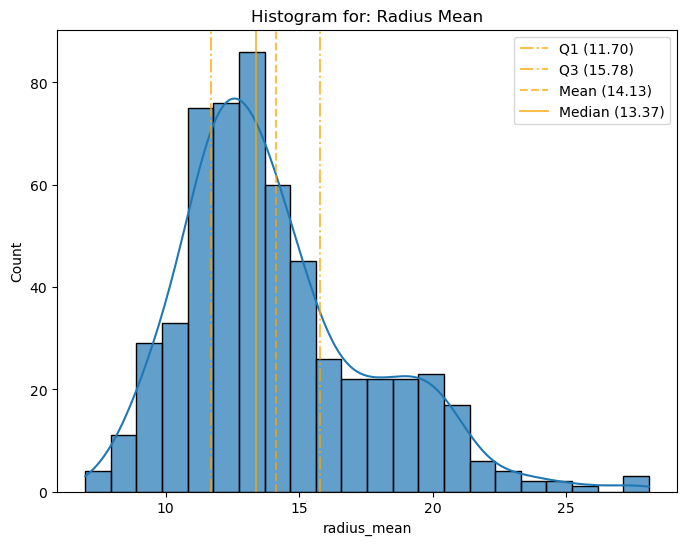

In [7]:
def create_histogram(df, column, title = True):
    """
    Creates a single plot with a histogram and a faint boxplot overlay for a specified column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column name for which to create the visualizations.
    """
    # Extract the data for the specified column
    data = df[column]

    # Set up the matplotlib figure
    plt.figure(figsize=(8, 6))

    # Create the histogram
    sns.histplot(data, kde=True, alpha=0.7)

    # Calculate median and quartiles for the boxplot overlay
    median = data.median()
    q1, q3 = data.quantile(0.25), data.quantile(0.75)

    # Add vertical lines for quartiles
    plt.axvline(q1, color='orange', linestyle='-.', label=f'Q1 ({q1:.2f})', alpha=0.7)
    plt.axvline(q3, color='orange', linestyle='-.', label=f'Q3 ({q3:.2f})', alpha=0.7)

    # Add vertical lines for mean and median
    plt.axvline(data.mean(), color='orange', linestyle='--', label=f'Mean ({data.mean():.2f})', alpha=0.7)
    plt.axvline(median, color='orange', linestyle='-', label=f'Median ({median:.2f})', alpha=0.7)

    # Add legend and title
    plt.legend()

    if title == True:
        plt.title(f"Histogram for: {column.replace('_', ' ').title()}")

    else:
        plt.title(column)

    # Display the plot
    plt.show()

# Example usage:
create_histogram(df, 'radius_mean')

In [8]:
def create_histogram_ax(df, column, ax, title = True):
    """
    Creates a single plot with a histogram and a faint boxplot overlay for a specified column in a DataFrame.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    column (str): The column name for which to create the visualizations.
    ax (matplotlib.axes.Axes): The Axes object to draw the plot onto.
    """
    # Extract the data for the specified column
    data = df[column]

    # Create the histogram
    sns.histplot(data, kde=True, alpha=0.7, ax=ax)

    # Calculate median and quartiles for the boxplot overlay
    median = data.median()
    q1, q3 = data.quantile(0.25), data.quantile(0.75)

    # Add vertical lines for quartiles
    ax.axvline(q1, color='orange', linestyle='-.', alpha=0.7)
    ax.axvline(q3, color='orange', linestyle='-.', alpha=0.7)

    # Add vertical lines for mean and median
    ax.axvline(data.mean(), color='orange', linestyle='--', label=f'Mean ({data.mean():.2f})', alpha=0.7)
    ax.axvline(median, color='orange', linestyle='-', label=f'Median ({median:.2f})', alpha=0.7)

    # Set title and labels
    if title == True:
        ax.set_title(f"{column.replace('_', ' ').title()}", fontsize=8)

    else: 
        ax.set_title(column, fontsize=8)
        
    ax.set_xlabel(xlabel=column, fontsize=8)
    ax.set_ylabel(ylabel='Count', fontsize=8)

    # Set tick label sizes
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

    # Add legend
    ax.legend(fontsize=8)

    return

In [9]:
def create_subplot_grid(df, columns, plot_function, title = True):
    """
    Creates a grid of plots for specified columns in a DataFrame using the given plotting function.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame.
    columns (list): List of column names for which to create the visualizations.
    plot_function (callable): A function that takes a DataFrame, a column name, and an Axes object, and creates a plot.
    """
    sns.set_style("darkgrid")
    
    num_cols = 3  # Number of columns in the grid
    num_rows = -(-len(columns) // num_cols)  # Number of rows needed to accommodate all columns
    
    # Set the fixed height and width for each subplot
    subplot_height = 3
    subplot_width = 4
    
    # Calculate the figure height and width based on the number of rows and columns and fixed subplot height and width
    fig_height = subplot_height * num_rows
    fig_width = subplot_width * num_cols
    
    # Create a figure with appropriate size and aspect ratio
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height))
    
    # Flatten the axes array to simplify indexing
    axes = axes.flatten()
    
    # Loop through each column and create plots using the specified plotting function
    for i, (ax, column) in enumerate(zip(axes, columns)):
        if i < len(columns):  # Only create plots for the required number of columns
            # Create plot for the current column using the specified plotting function
            plot_function(df, column, ax, title)
        else:
            # Hide empty subplots
            ax.axis('off')

    # Remove excess subplots
    for ax in axes[len(columns):]:
        ax.remove()

    # suptitle
    plt.suptitle('Histograms:', y = 1.01)

    # Adjust layout
    plt.tight_layout()

    return

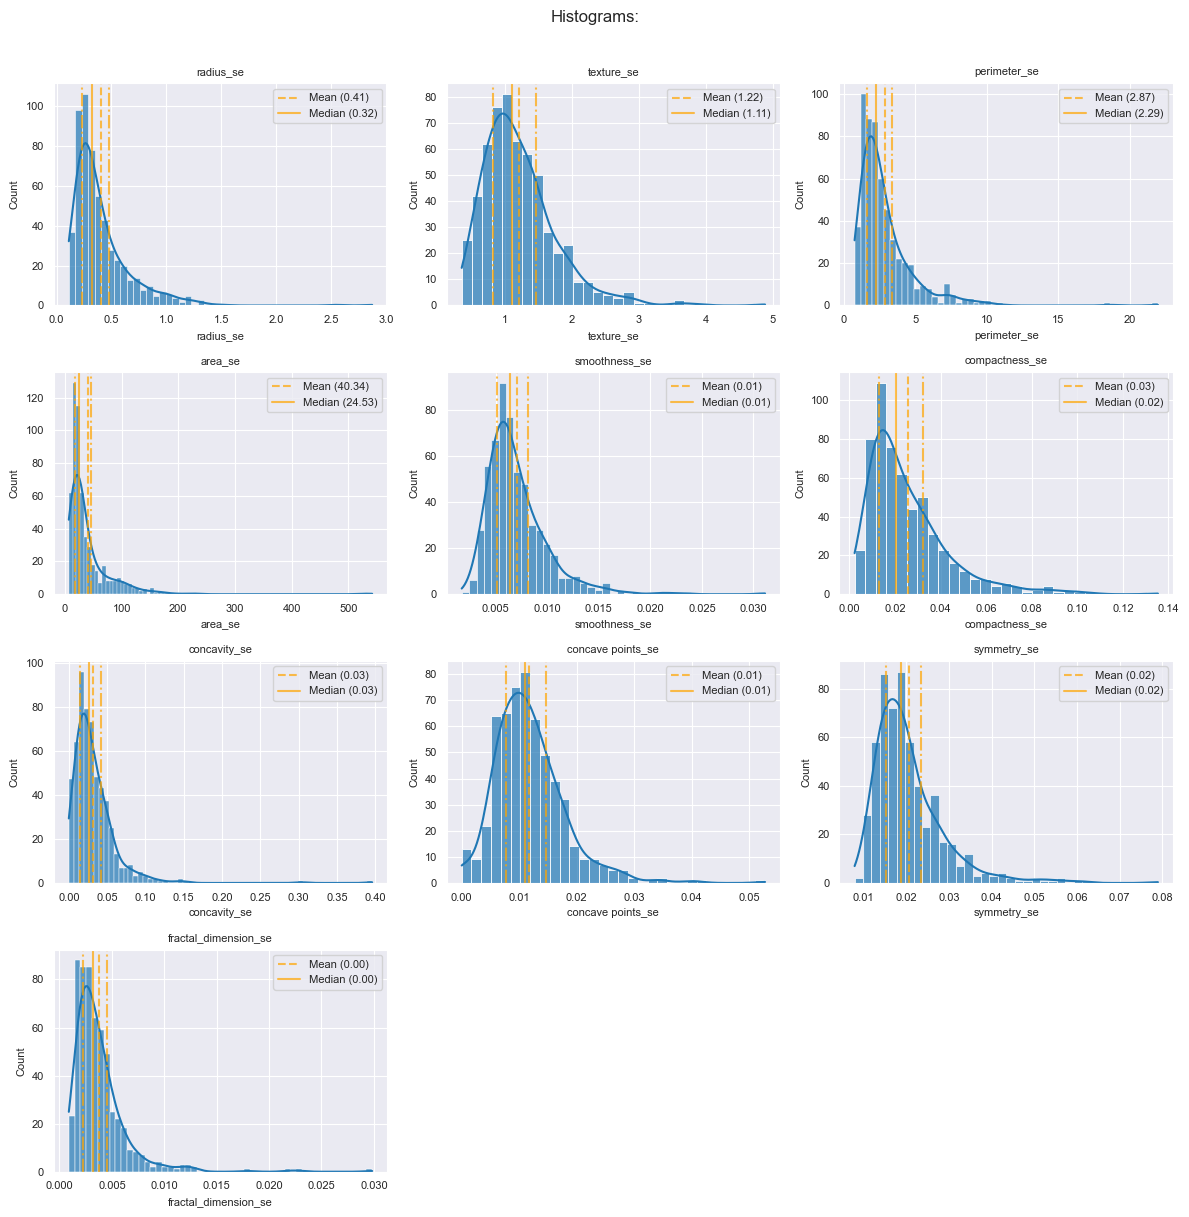

In [10]:
create_subplot_grid(df, se_columns, create_histogram_ax, title = False)

In [11]:
def calculate_correlation_significance(df, columns, significance_threshold=0.05):
    """
    Calculates Pearson correlation coefficients and creates a binary column indicating significance.
    
    Parameters:
    df (pd.DataFrame): The input DataFrame containing numeric columns.
    significance_threshold (float): The significance threshold for correlation coefficients (default is 0.05).
    
    Returns:
    pd.DataFrame: Binary DataFrame indicating significance of correlation coefficients.
    pd.DataFrame: Correlation matrix.
    """
    # Calculate Pearson correlation coefficients and p-values
    correlation_matrix = df[columns].corr(method=lambda x, y: pearsonr(x, y)[0])
    p_values = df[columns].corr(method=lambda x, y: pearsonr(x, y)[1])

    # Create a binary column indicating significance
    is_significant = p_values < significance_threshold

    # Convert boolean values to 0/1
    binary_df = is_significant.astype(int)
    
    return binary_df, correlation_matrix

binary_df, corr_matrix = calculate_correlation_significance(df, columns = mean_columns)

In [12]:
corr_matrix

radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.323782        0.997855   0.987357   
texture_mean               0.323782      1.000000        0.329533   0.321086   
perimeter_mean             0.997855      0.329533        1.000000   0.986507   
area_mean                  0.987357      0.321086        0.986507   1.000000   
smoothness_mean            0.170581     -0.023389        0.207278   0.177028   
compactness_mean           0.506124      0.236702        0.556936   0.498502   
concavity_mean             0.676764      0.302418        0.716136   0.685983   
concave points_mean        0.822529      0.293464        0.850977   0.823269   
symmetry_mean              0.147741      0.071401        0.183027   0.151293   
fractal_dimension_mean    -0.311631     -0.076437       -0.261477  -0.283110   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.170581          0.506124        0.676764   
texture_mean                  -0.023389          0.236702        0.302418   
perimeter_mean                 0.207278          0.556936        0.716136   
area_mean                      0.177028          0.498502        0.685983   
smoothness_mean                1.000000          0.659123        0.521984   
compactness_mean               0.659123          1.000000        0.883121   
concavity_mean                 0.521984          0.883121        1.000000   
concave points_mean            0.553695          0.831135        0.921391   
symmetry_mean                  0.557775          0.602641        0.500667   
fractal_dimension_mean         0.584792          0.565369        0.336783   

                        concave points_mean  symmetry_mean  \
radius_mean                        0.822529       0.147741   
texture_mean                       0.293464       0.071401   
perimeter_mean                     0.850977       0.183027   
area_mean                          0.823269       0.151293   
smoothness_mean                    0.553695       0.557775   
compactness_mean                   0.831135       0.602641   
concavity_mean                     0.921391       0.500667   
concave points_mean                1.000000       0.462497   
symmetry_mean                      0.462497       1.000000   
fractal_dimension_mean             0.166917       0.479921   

                        fractal_dimension_mean  
radius_mean                          -0.311631  
texture_mean                         -0.076437  
perimeter_mean                       -0.261477  
area_mean                            -0.283110  
smoothness_mean                       0.584792  
compactness_mean                      0.565369  
concavity_mean                        0.336783  
concave points_mean                   0.166917  
symmetry_mean                         0.479921  
fractal_dimension_mean                1.000000

In [49]:
def visualize_correlation_heatmap(corr_matrix, binary_df, annot = True):
    """
    Visualizes correlation coefficients using a heatmap with masked insignificant cells.
    
    Parameters:
    corr_matrix (pd.DataFrame): Correlation matrix.
    binary_df (pd.DataFrame): Binary DataFrame indicating significance of correlation coefficients.
    """
    sns.set_style("white")

    # Create mask to remove non-significant (0 binary) values and upper triangular mask
    mask = np.triu(binary_df.values, k=1)  # Mask upper triangle (excluding diagonal)
    mask |= (binary_df.values == 0)  # Mask non-significant (0 binary) values
    
    # Set up the heatmap
    plt.figure(figsize=(12, 10))
    
    # Customize the heatmap
    sns.heatmap(corr_matrix
                ,mask = mask
                ,vmin = -1
                ,vmax = 1
                ,cmap = 'coolwarm'
                ,annot = annot
                ,annot_kws = {'fontsize': 10}
                ,fmt = ".2f"
                ,square = True
                ,linewidths = .5)

    # Add title
    plt.title('Correlation Heatmap with Masked Insignificant Cells')

    # Show plot
    plt.show()

    return

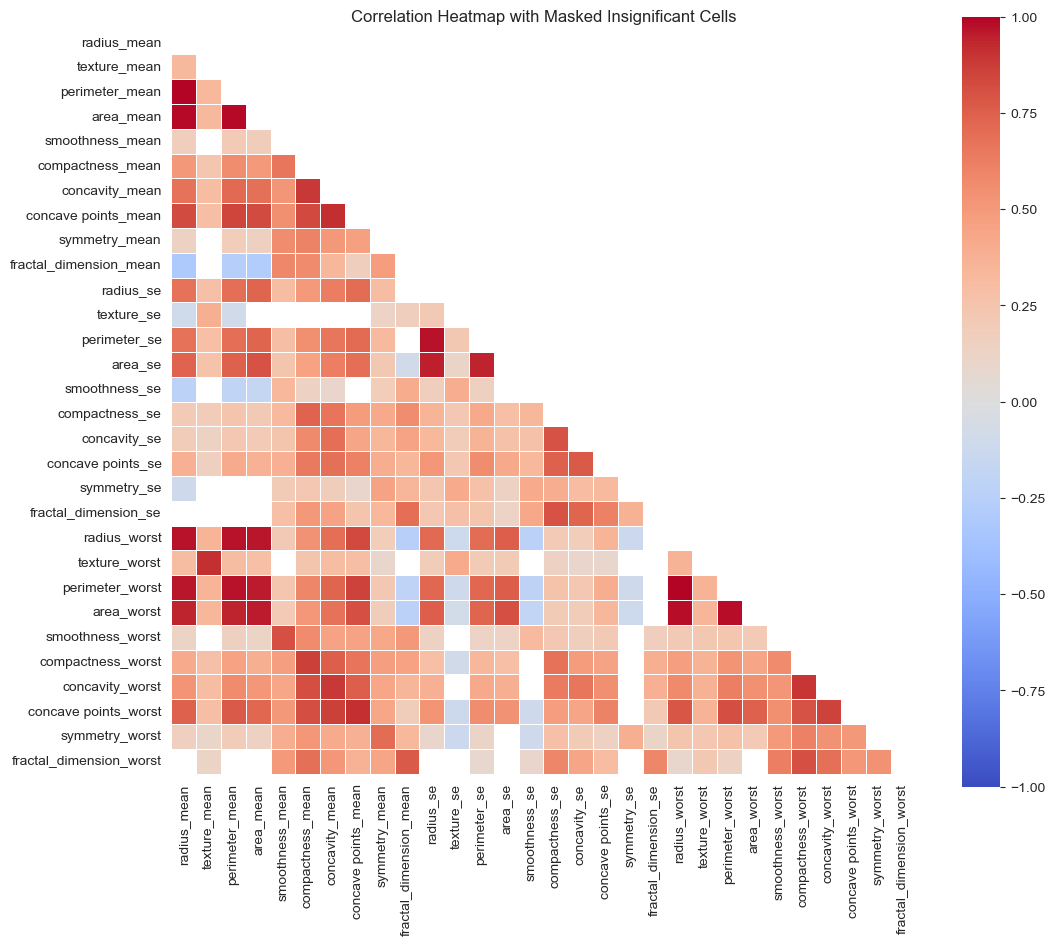

In [50]:
binary_df, corr_matrix = calculate_correlation_significance(df, columns = mean_columns + se_columns + worst_columns)

visualize_correlation_heatmap(corr_matrix, binary_df, annot = False)

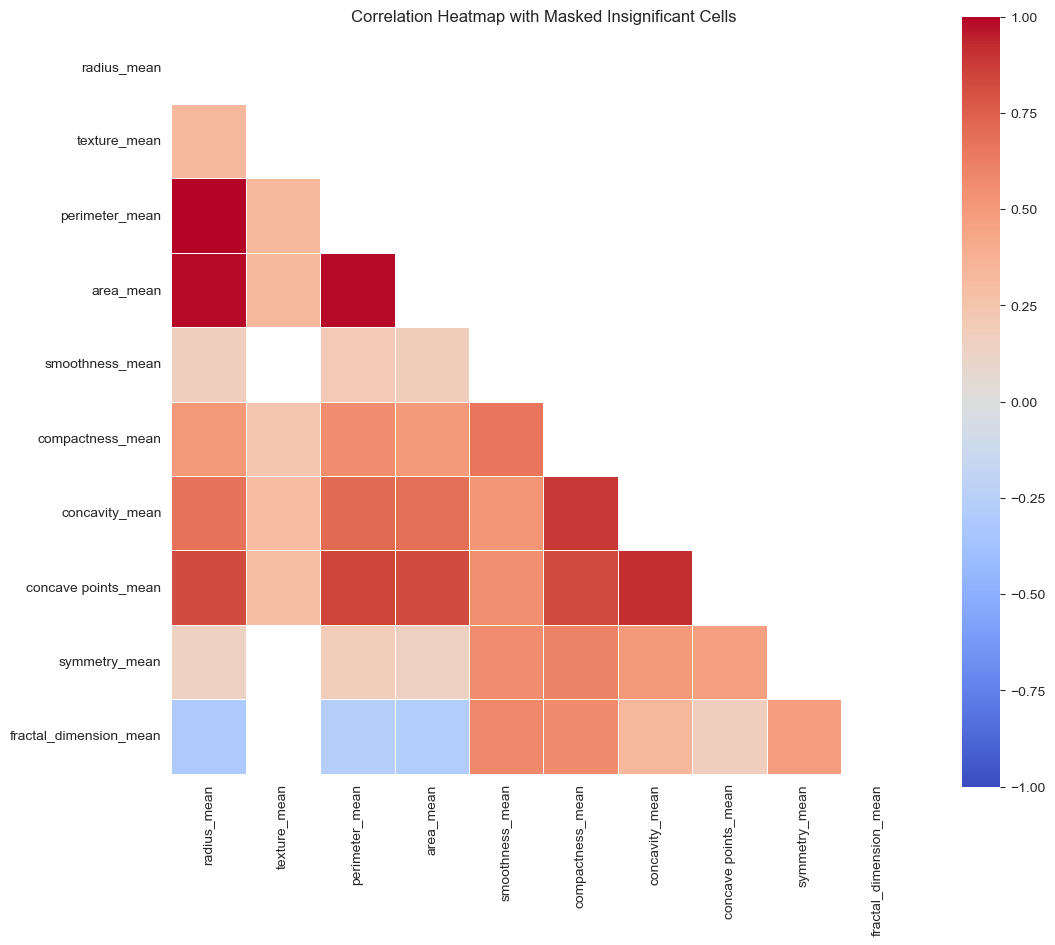

In [51]:
binary_df, corr_matrix = calculate_correlation_significance(df, columns = mean_columns)

visualize_correlation_heatmap(corr_matrix, binary_df, annot = False)

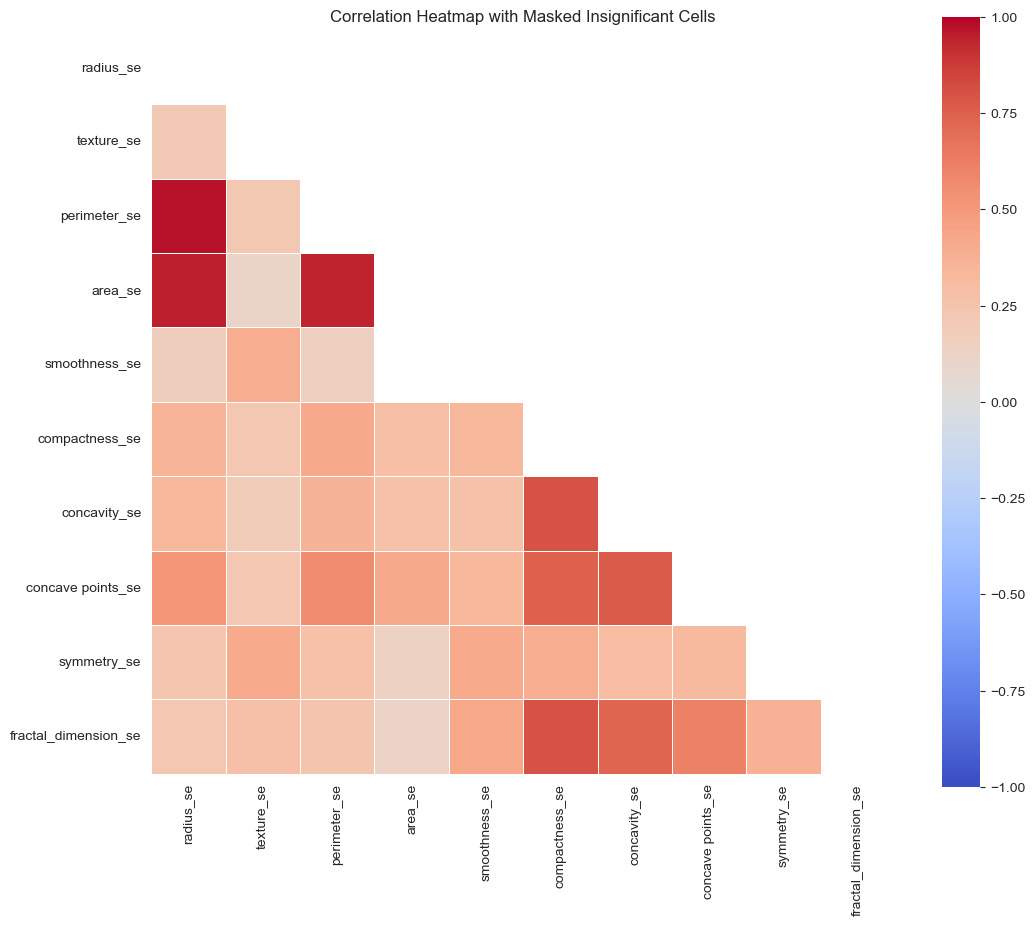

In [52]:
binary_df, corr_matrix = calculate_correlation_significance(df, columns = se_columns)

visualize_correlation_heatmap(corr_matrix, binary_df, annot = False)

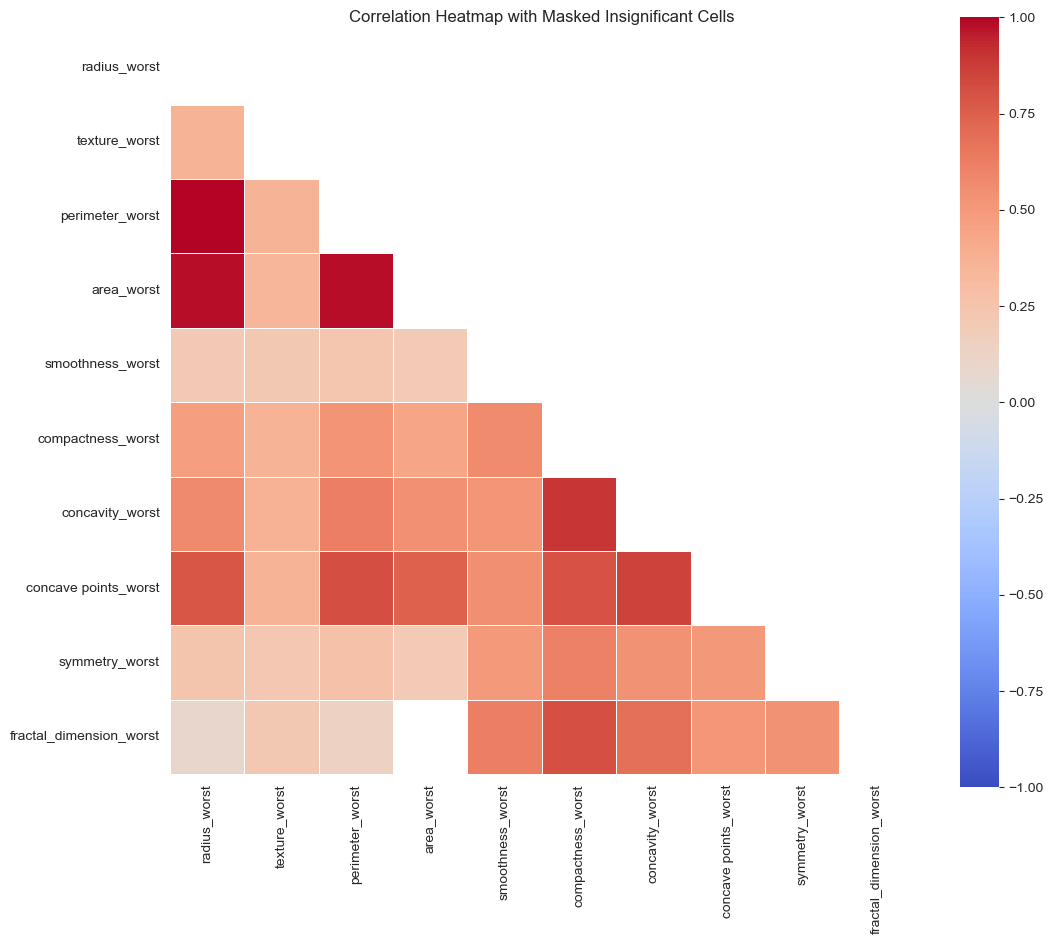

In [53]:
binary_df, corr_matrix = calculate_correlation_significance(df, columns = worst_columns)

visualize_correlation_heatmap(corr_matrix, binary_df, annot = False)

In [15]:
def print_non_significant_relationships(binary_df):
    """
    Prints the row and column names of non-significant relationships.
    
    Parameters:
    binary_df (pd.DataFrame): Binary DataFrame indicating significance of correlation coefficients.
    """
    # Iterate through the DataFrame
    for i, row in binary_df.iterrows():
        # Check if all values in the row are equal to 1 (indicating significance)
        if (row == 1).all():
            print(f"None for '{i}'")
        else:
            print(i)
            # Initialize a set to keep track of processed relationships
            processed_relationships = set()
            # Iterate through the row and print column names where the value is 0
            for j, value in row.items():
                # Check if the relationship is not between the same variable (n, n)
                if i != j:
                    # Check if the relationship has not been processed and the value is 0
                    if (i, j) not in processed_relationships and (j, i) not in processed_relationships and value == 0:
                        print(f"Non-significant relationship between '{i}' and '{j}'")
                        # Add the relationship to the processed set
                        processed_relationships.add((i, j))
            print()

# print_non_significant_relationships(binary_df)

## Observing Outcome

In [16]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [17]:
print(df['diagnosis'].value_counts())
print()
print(df['diagnosis'].value_counts(normalize = True))

diagnosis
B    357
M    212
Name: count, dtype: int64

diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64


In [18]:
df['diagnosis'] = df['diagnosis'].map({'B': 0
                                       ,'M': 1})

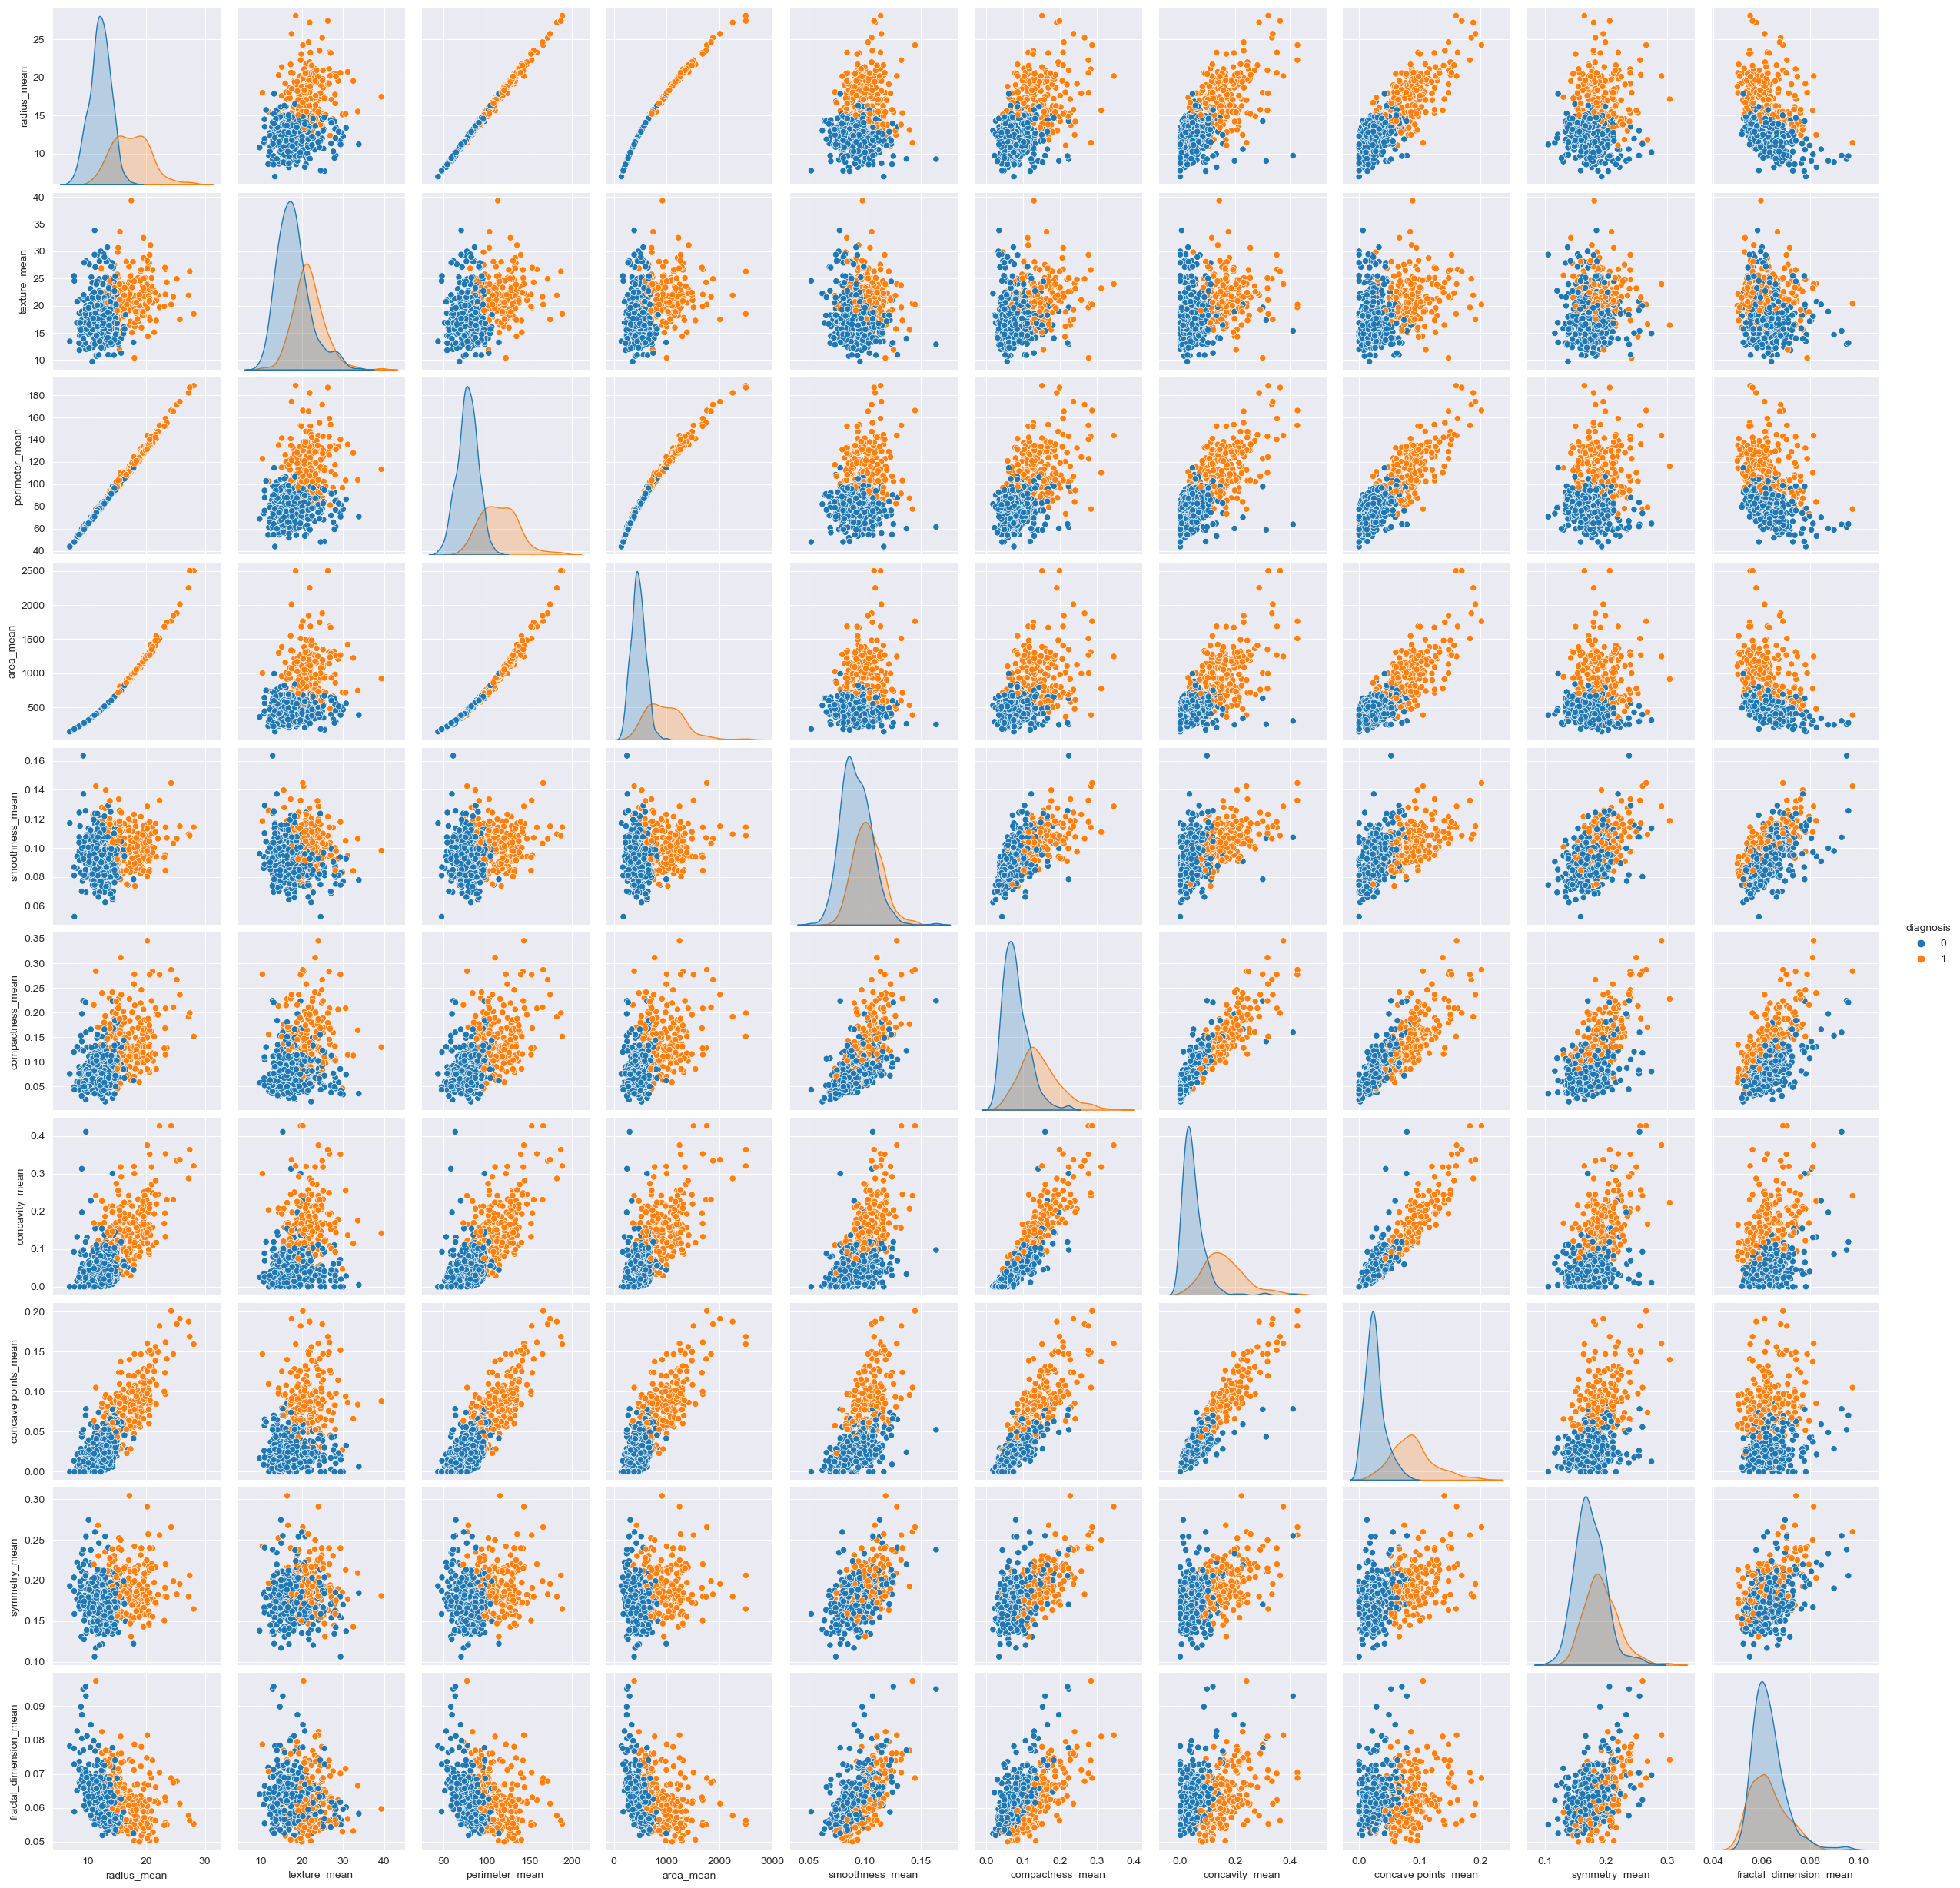

In [19]:
# sns.pairplot(df[['diagnosis'] + mean_columns], hue = 'diagnosis');

In [20]:
#pointbiserialr use to make corr heatmap for outcome

#### Single Feature Logistic Regression

In [68]:
def single_feature_logistic_regression(df, target_col, feature_cols, plot=True):
    results = []

    for feature in feature_cols:
        X = df[[feature]]
        y = df[target_col]

        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        model = LogisticRegression()
        model.fit(X_train, y_train)

        # Predict probabilities for testing set
        y_prob = model.predict_proba(X_test)
        
        # Get coefficient and intercept
        coef = model.coef_[0][0]
        intercept = model.intercept_[0]

        # Calculate odds ratio
        odds_ratio = np.exp(coef)

        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        results.append({'Feature': feature, 'Accuracy': accuracy,
                        'Coefficient': coef, 'Intercept': intercept,
                        'Odds Ratio': odds_ratio})

        # Plot the predicted probabilities for testing data along with actual class labels if plot is True
        if plot:
            plt.rcParams.update({'font.size': 8})
            plt.figure(figsize=(6, 4))
            sns.scatterplot(x=X_test.iloc[:, 0], y=y_prob[:, 1], hue=y_test)
            plt.xlabel(feature)
            plt.ylabel('Probability of Malignancy')
            plt.ylim(-0.10, 1.10)
            plt.title(f'Logistic Regression Predictions - {feature}\nAccuracy: {round(accuracy, 4)}')
            legend =  plt.legend(title='Actual Diagnosis', loc='upper left', fontsize = 8)
            plt.setp(legend.get_title(), fontsize=8)
            plt.show()


    return pd.DataFrame(results)


# Example usage:
# Assuming df is your DataFrame with 'diagnosis' as the target column and other features as feature columns
target_col = 'diagnosis'  # Target column name
results_df = single_feature_logistic_regression(df, target_col, mean_columns + se_columns + worst_columns, plot = False)

In [69]:
results_df.sort_values(by = 'Odds Ratio', ascending = False)

Feature  Accuracy  Coefficient  Intercept   Odds Ratio
27     concave points_worst  0.815789     7.837749  -1.449156  2534.492775
6            concavity_mean  0.798246     7.213934  -1.189782  1358.224698
26          concavity_worst  0.842105     6.439313  -2.371655   625.976563
25        compactness_worst  0.789474     6.290734  -2.157145   539.549121
7       concave points_mean  0.675439     5.625400  -0.802716   277.383194
10                radius_se  0.824561     5.619774  -2.738217   275.827064
5          compactness_mean  0.684211     5.252344  -1.078357   191.013487
28           symmetry_worst  0.649123     4.282739  -1.777307    72.438574
24         smoothness_worst  0.622807     2.064742  -0.797961     7.883264
8             symmetry_mean  0.622807     1.945004  -0.878690     6.993663
16             concavity_se  0.622807     1.371701  -0.571334     3.942049
12             perimeter_se  0.824561     1.369414  -4.240390     3.933044
29  fractal_dimension_worst  0.622807     1.186599  -0.625668     3.275922
4           smoothness_mean  0.622807     1.123906  -0.633732     3.076849
20             radius_worst  0.938596     1.054382 -17.565511     2.870199
15           compactness_se  0.622807     1.002460  -0.551835     2.724976
0               radius_mean  0.912281     0.948621 -14.036740     2.582146
17        concave points_se  0.622807     0.523390  -0.532319     1.687740
1              texture_mean  0.692982     0.239952  -5.204456     1.271188
21            texture_worst  0.675439     0.196466  -5.661117     1.217094
22          perimeter_worst  0.964912     0.161997 -17.862242     1.175856
2            perimeter_mean  0.929825     0.151145 -14.526079     1.163165
13                  area_se  0.921053     0.123675  -4.540850     1.131648
19     fractal_dimension_se  0.622807     0.025519  -0.526191     1.025847
3                 area_mean  0.921053     0.010872  -7.414512     1.010931
23               area_worst  0.938596     0.010865  -9.285249     1.010924
18              symmetry_se  0.622807     0.008416  -0.526266     1.008451
11               texture_se  0.622807    -0.011970  -0.511703     0.988102
9    fractal_dimension_mean  0.622807    -0.022530  -0.524678     0.977722
14            smoothness_se  0.622807    -0.038988  -0.525821     0.961763

In [70]:
results_df[results_df['Accuracy'] >= 0.90].sort_values(by = 'Accuracy', ascending = False)

Feature  Accuracy  Coefficient  Intercept  Odds Ratio
22  perimeter_worst  0.964912     0.161997 -17.862242    1.175856
20     radius_worst  0.938596     1.054382 -17.565511    2.870199
23       area_worst  0.938596     0.010865  -9.285249    1.010924
2    perimeter_mean  0.929825     0.151145 -14.526079    1.163165
3         area_mean  0.921053     0.010872  -7.414512    1.010931
13          area_se  0.921053     0.123675  -4.540850    1.131648
0       radius_mean  0.912281     0.948621 -14.036740    2.582146

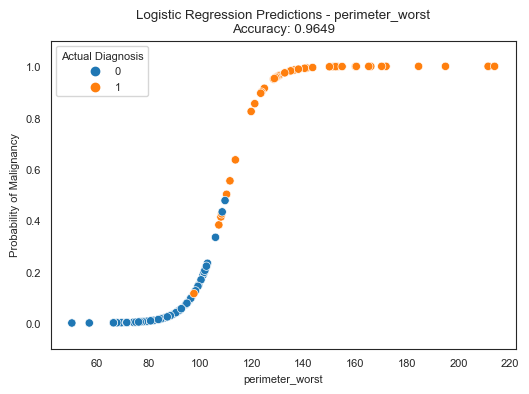

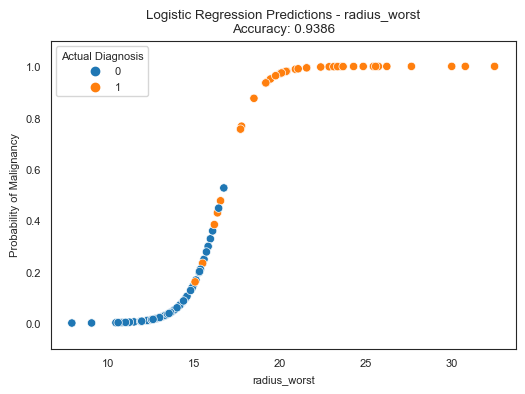

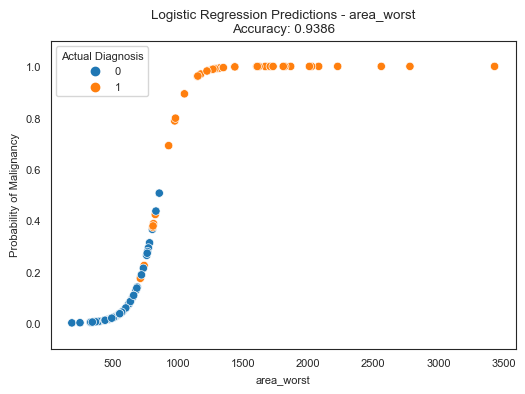

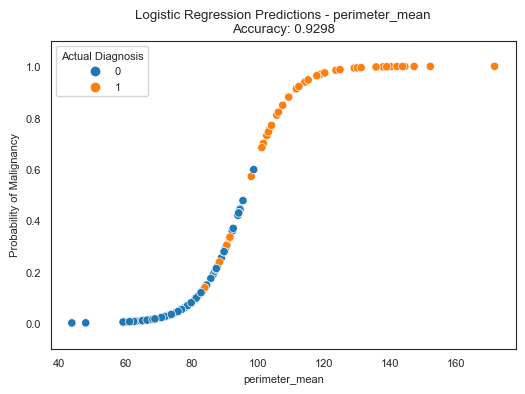

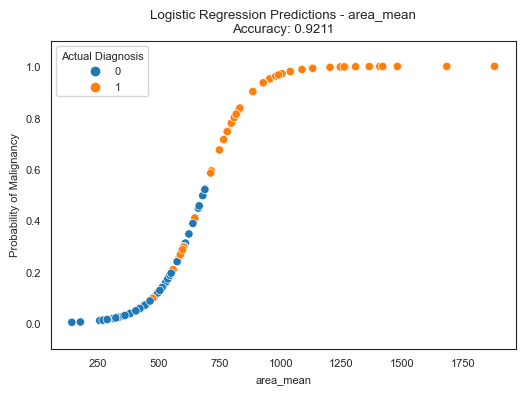

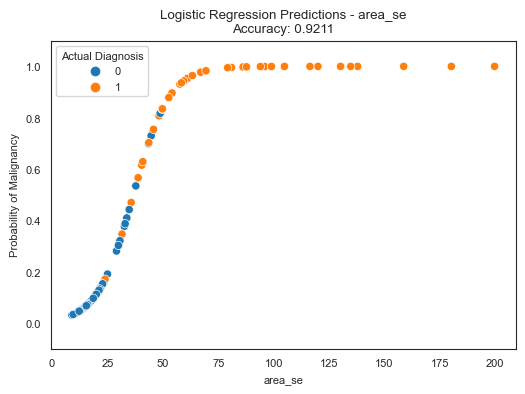

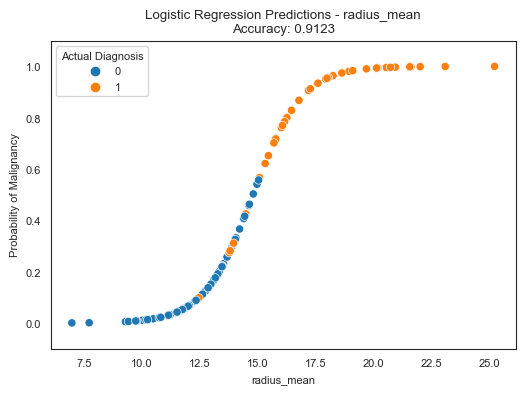

In [72]:
temp = results_df[results_df['Accuracy'] >= 0.90].sort_values(by = 'Accuracy', ascending = False)['Feature']

results_df_refined = single_feature_logistic_regression(df, target_col, temp)

#### Multivariate Logistic Regression

In [23]:
def fit_lasso_logistic_regression(df, target_col, feature_cols, alpha=1.0):
    X = df[feature_cols]
    y = df[target_col]

    # Splitting the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

    model = LogisticRegression(penalty='l1', solver='liblinear', C=1/alpha)  # C is the inverse of regularization strength
    model.fit(X_train, y_train)

    # Calculate probability scores and predicted labels for the test set
    y_score = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    # Evaluate the model's performance on the training set
    train_accuracy = model.score(X_train, y_train)

    # Evaluate the model's performance on the testing set
    test_accuracy = model.score(X_test, y_test)

    res_dict = {
        'features': feature_cols,
        'coefficients': model.coef_[0],
        'intercept': model.intercept_[0],
        'training_accuracy': train_accuracy,
        'testing_accuracy': test_accuracy,
        'y_score': y_score,
        'y_pred': y_pred,
    }

    return X_train, X_test, y_train, y_test, res_dict

# Example usage:
# Assuming df is your DataFrame with 'diagnosis' as the target column and other features as feature columns
target_col = 'diagnosis'  # Target column name
X_train, X_test, y_train, y_test, lasso_results = fit_lasso_logistic_regression(df, target_col, mean_columns + se_columns + worst_columns)

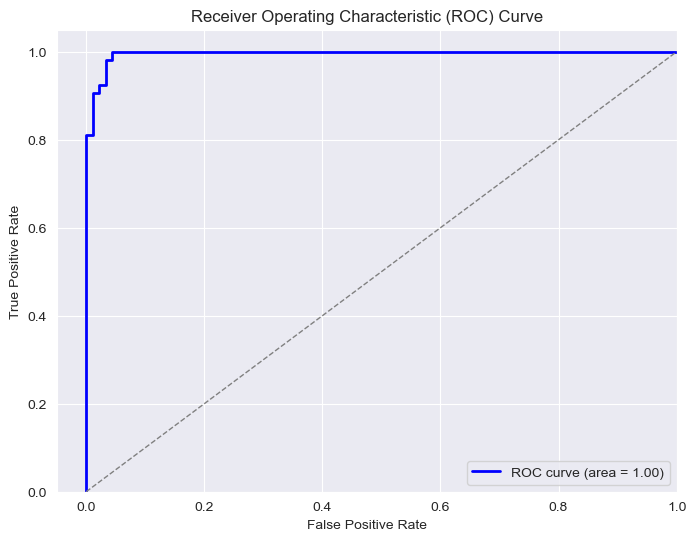

In [24]:
def plot_roc_curve(y_test, y_score):
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example usage:
# Assuming lasso_results is the dictionary returned by fit_lasso_logistic_regression
plot_roc_curve(y_test, lasso_results['y_score'])

<Figure size 800x600 with 0 Axes>

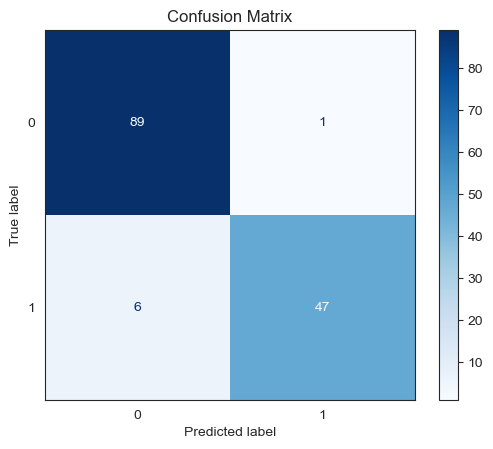

In [25]:
def visualize_confusion_matrix(y_true, y_pred):
    sns.set_style("white")

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
    plt.figure(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.show()

# Example usage:
# Assuming lasso_results is the dictionary returned by fit_lasso_logistic_regression
visualize_confusion_matrix(y_test, lasso_results['y_pred'])

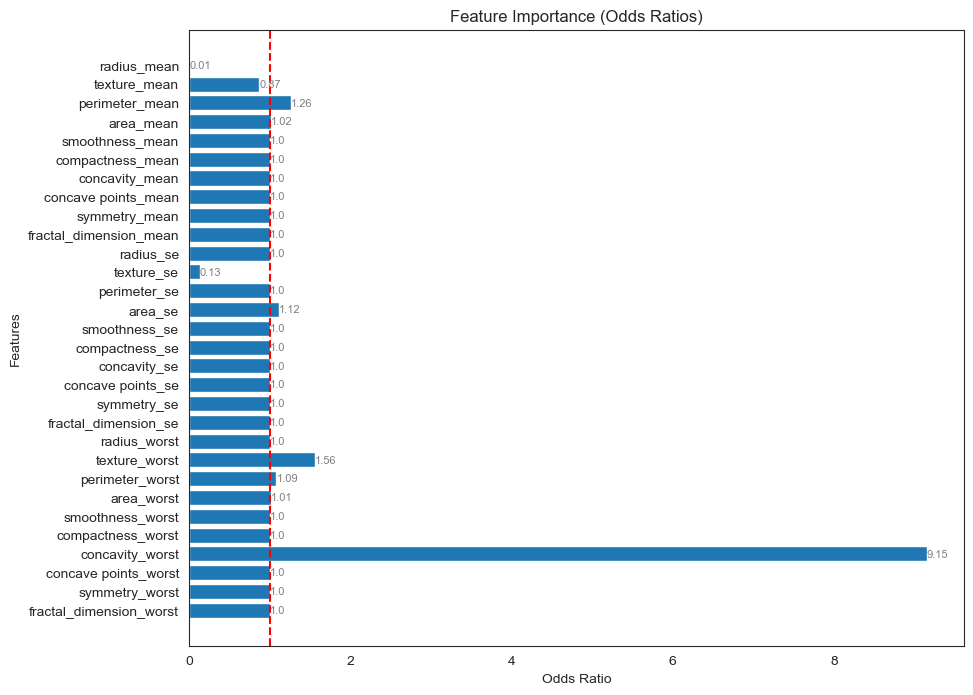

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_odds_ratios(coefficients, feature_names):
    # Calculate odds ratios
    odds_ratios = np.exp(coefficients)

    # Round the odds ratios to two decimal places
    rounded_odds_ratios = [round(x, 2) for x in odds_ratios]

    # Plotting
    fig, ax = plt.subplots(figsize=(10, 8))
    rects = ax.barh(feature_names, odds_ratios)

    # Bar labels
    for rect, label in zip(rects, rounded_odds_ratios):
        width = rect.get_width()
        ax.text(width, rect.get_y() + rect.get_height() / 2, f'{label}', ha='left', va='center', color='grey', fontsize=8)

    # Add a red dashed vertical line at 1
    ax.axvline(x=1, color='red', linestyle='--')
    
    ax.set_xlabel('Odds Ratio')
    ax.set_ylabel('Features')
    ax.set_title('Feature Importance (Odds Ratios)')

    plt.gca().invert_yaxis()
    plt.show()

# Example usage:
# Assuming you have already run your logistic regression and obtained the coefficients
coefficients = lasso_results['coefficients']
feature_names = lasso_results['features']

# Plot odds ratios
plot_odds_ratios(coefficients, feature_names)


In [27]:
np.exp(coefficients)

array([0.01163447, 0.87259787, 1.26089469, 1.01759238, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 0.13299611, 1.        , 1.11994302, 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.56324476, 1.08576245, 1.01279658, 1.        ,
       1.        , 9.15086575, 1.        , 1.        , 1.        ])

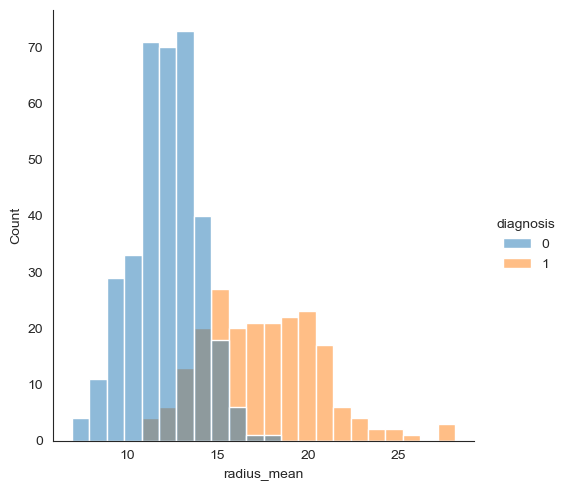

In [45]:
sns.displot(data = df, x = 'radius_mean', hue = 'diagnosis')

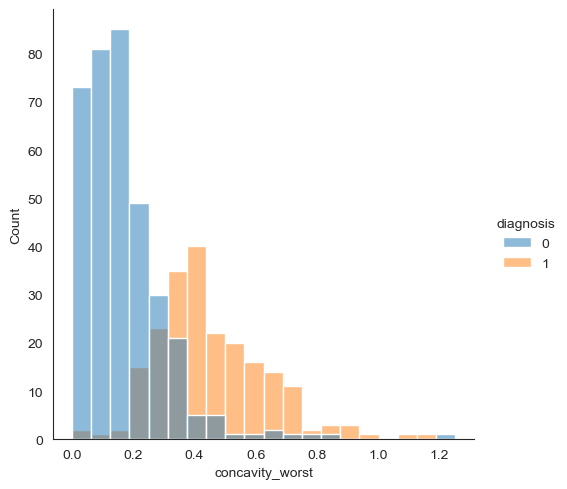

In [46]:
sns.displot(data = df, x = 'concavity_worst', hue = 'diagnosis')